# ASSIGNMENT 5

### ANWESHA PAUL <br> MDS202213

In [1]:
# Import necessary libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
from scipy.signal import convolve2d

# 1.

In [2]:
img = cv2.imread("moon.jpg", 0)

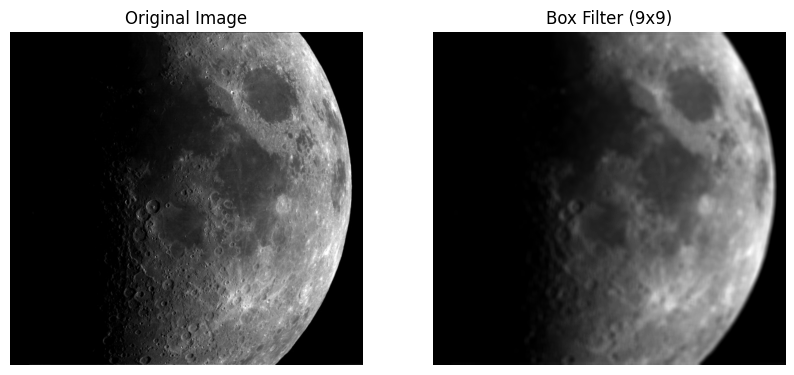

In [3]:
# Define a 9x9 box filter
box_filter = np.ones((9, 9)) / (9 * 9)

# Apply the box filter to the image
filtered_img = cv2.filter2D(img, -1, box_filter)

# Display original and filtered images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot filtered image
axes[1].imshow(filtered_img, cmap="gray")
axes[1].set_title("Box Filter (9x9)")
axes[1].axis('off')

# Show the plot
plt.show()

**CONCLUSION**: The application of a box filter tends to smooth and blur images, a process that commonly aids in noise reduction. However, an observable outcome of this smoothing is a reduction in edge clarity. 

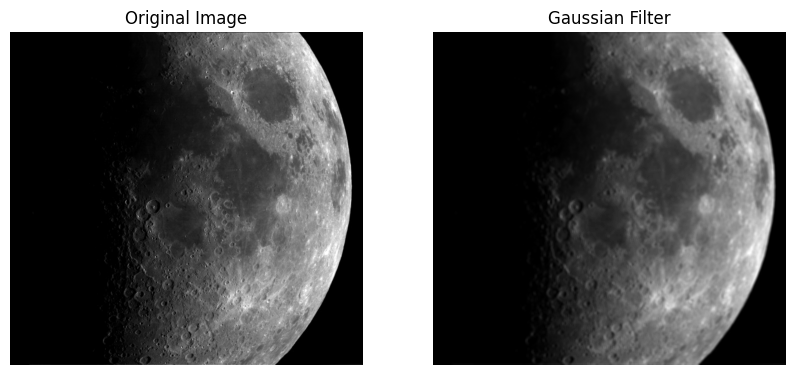

In [4]:
# Generate a 5x1 Gaussian kernel with standard deviation of 10
gaussian_kernel = cv2.getGaussianKernel(5, 10)

# Create a 5x5 Gaussian filter by multiplying the kernel with its transpose
gaussian_filter = np.outer(gaussian_kernel, gaussian_kernel.T)

# Apply the Gaussian filter to the image
gauss_img = cv2.filter2D(img, -1, gaussian_filter)

# Display original and filtered images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot filtered image
axes[1].imshow(gauss_img, cmap="gray")
axes[1].set_title("Gaussian Filter")
axes[1].axis('off')

# Show the plot
plt.show()

**CONCLUSION**: The Gaussian filter, like the box filter, is employed to blur images. However, it achieves this blurring effect more uniformly compared to the box filter. This means that the blurring introduced by the Gaussian filter is distributed more evenly across the image, resulting in a smoother and more natural appearance.

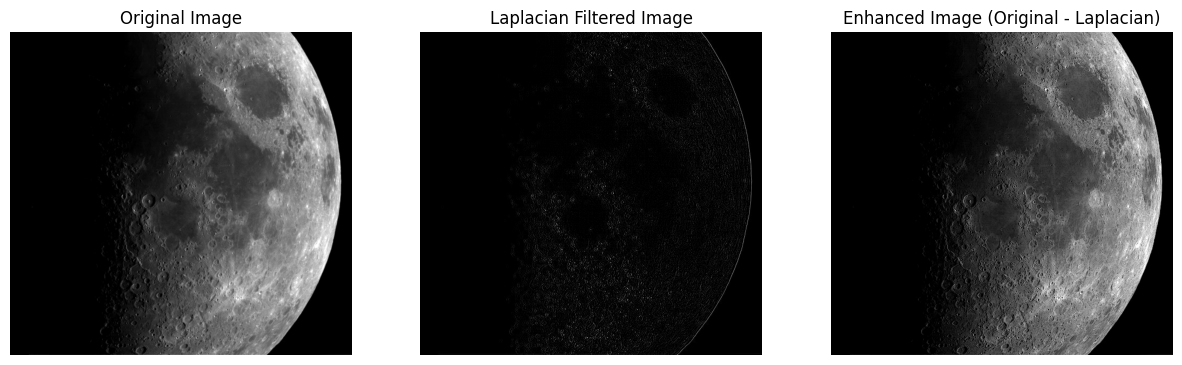

In [5]:
# Define the Laplacian filter
laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Apply the Laplacian filter to the image
lap_img = cv2.filter2D(img, -1, laplacian_filter)

# Subtract Laplacian filtered image from the original image
res_img = cv2.subtract(img, lap_img)

# Display original, Laplacian filtered, and resultant images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot Laplacian filtered image
axes[1].imshow(lap_img, cmap="gray")
axes[1].set_title("Laplacian Filtered Image")
axes[1].axis('off')

# Plot resultant image
axes[2].imshow(res_img, cmap="gray")
axes[2].set_title("Enhanced Image (Original - Laplacian)")
axes[2].axis('off')

# Show the plot
plt.show()


**CONCLUSION**: The Laplacian filter is a valuable tool for edge detection in images. By appropriately combining the filtered image with the original using an addition operation (with a coefficient of -1, owing to the negative center kernel), edges are effectively enhanced.

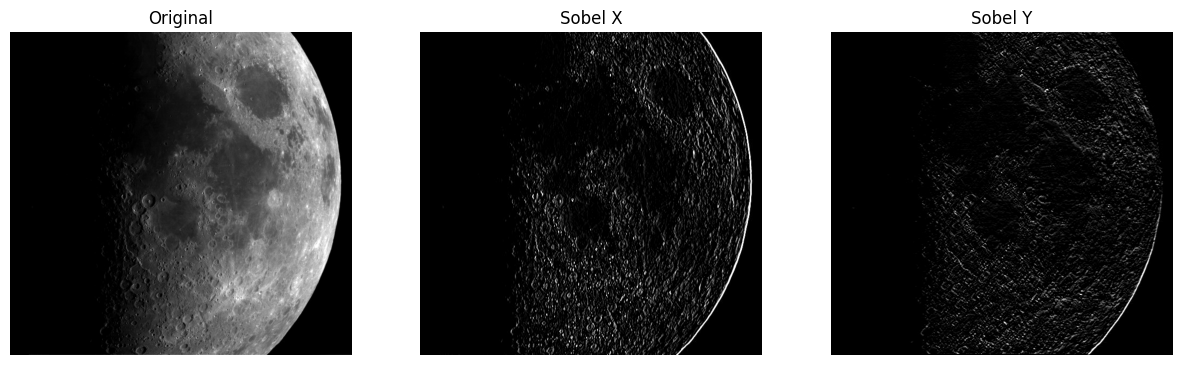

In [6]:
# Define Sobel filters in x and y directions
sobel_x = cv2.flip(np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), -1)
sobel_y = cv2.flip(np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), -1)

# Apply Sobel filters to the image
sobel_x_img = cv2.filter2D(img, -1, sobel_x)
sobel_y_img = cv2.filter2D(img, -1, sobel_y)

# Display original, Sobel filtered in x-direction, and Sobel filtered in y-direction images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original")

# Plot Sobel filtered image in x-direction
axes[1].imshow(sobel_x_img, cmap="gray")
axes[1].set_title("Sobel X")

# Plot Sobel filtered image in y-direction
axes[2].imshow(sobel_y_img, cmap="gray")
axes[2].set_title("Sobel Y")

# Hide axis for all subplots
for ax in axes: ax.axis('off')

# Show the plot
plt.show()

**CONCLUSION**: Utilizing the Sobel filter effectively enhances edge detection. Its application in the X-direction emphasizes horizontal edges, while in the Y-direction, it emphasizes vertical edges.

# 2.

In [7]:
# Function to create an image of size 100x100 with a white rectangle at the center
def create_rectangle_image(length, breadth):

    img = np.zeros((100, 100), dtype=np.uint8)
    M, N = img.shape
    c_row = M // 2
    c_col = N // 2
    rec_m, rec_n = length, breadth

    # Creating rectangle in the middle
    img[(c_row - (rec_m // 2)): (c_row + (rec_m // 2)),
    (c_col - (rec_n // 2)): (c_col + (rec_n // 2))] = 255

    return img

# Function to plot the spectrum of an image with a white rectangle at the center
def plot_spectrum(length, breadth):

    img = create_rectangle_image(length, breadth)
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1])

    magnitude_spectrum = 20 * np.log(1 + magnitude_spectrum)
    power_spectrum = np.power(magnitude_spectrum, 2)

    fig = plt.figure(figsize=(14, 4))

    # Plotting the original image
    ax1 = fig.add_subplot(1, 4, 1)
    ax1.imshow(img, cmap="gray")
    ax1.set_title("Image")
    ax1.axis('off')

    # Plotting the magnitude spectrum
    ax2 = fig.add_subplot(1, 4, 2)
    ax2.imshow(magnitude_spectrum, cmap="gray")
    ax2.set_title("Magnitude Spectrum")
    ax2.axis('off')

    # Plotting the phase spectrum
    ax3 = fig.add_subplot(1, 4, 3)
    ax3.imshow(phase_spectrum, cmap="gray")
    ax3.set_title("Phase Spectrum")
    ax3.axis('off')

    # Plotting the power spectrum
    ax4 = fig.add_subplot(1, 4, 4)
    ax4.imshow(power_spectrum, cmap="gray")
    ax4.set_title("Power Spectrum")
    ax4.axis('off')

    plt.tight_layout()
    plt.show()

Creating an image with a white rectangle at the center of size 5x5


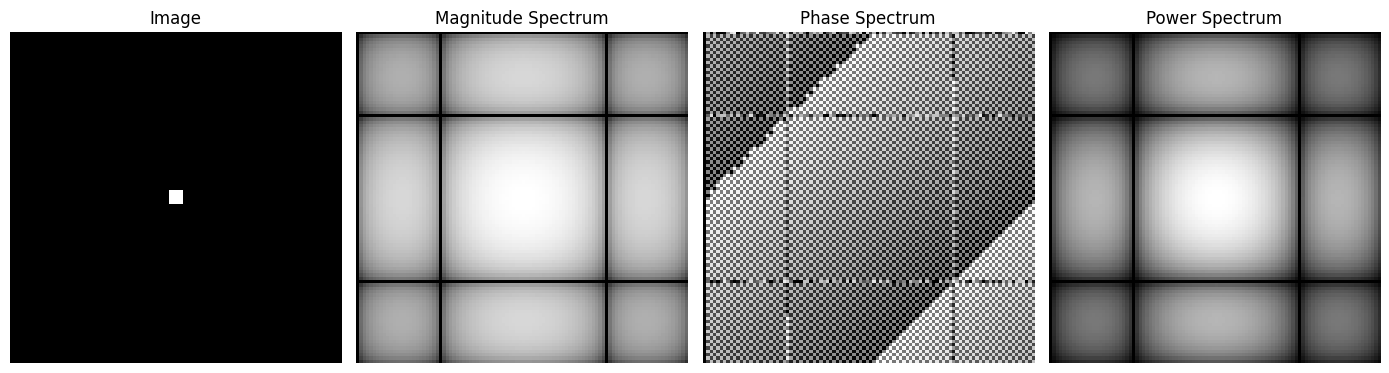

In [8]:
# Getting input for rectangle dimensions
length = int(input("Enter the length of the rectangle: "))
breadth = int(input("Enter the breadth of the rectangle: "))

print(f"Creating an image with a white rectangle at the center of size {length}x{breadth}")

# Plotting the spectrum
plot_spectrum(length, breadth)

Creating an image with a white rectangle at the center of size 10x10


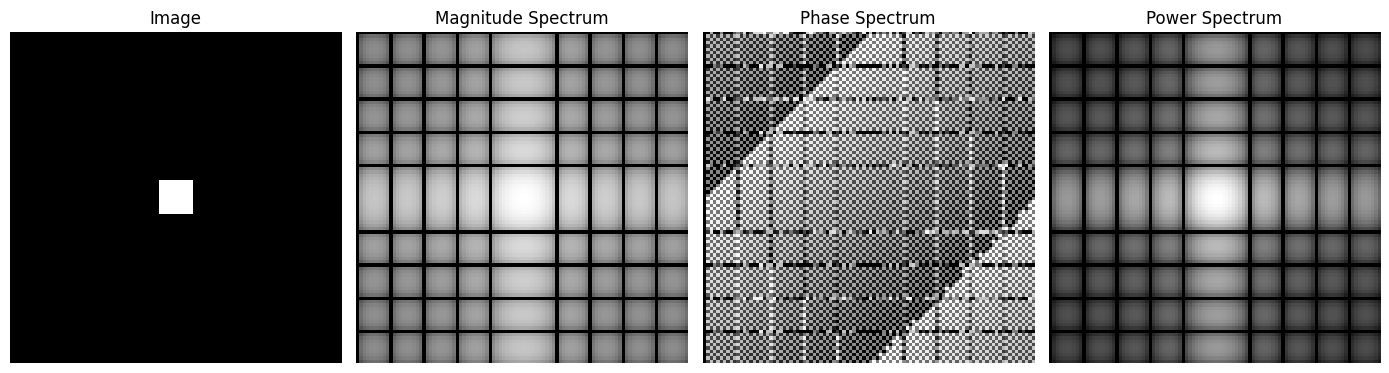

In [9]:
# Getting input for rectangle dimensions
length = int(input("Enter the length of the rectangle: "))
breadth = int(input("Enter the breadth of the rectangle: "))

print(f"Creating an image with a white rectangle at the center of size {length}x{breadth}")

# Plotting the spectrum
plot_spectrum(length, breadth)

Creating an image with a white rectangle at the center of size 25x25


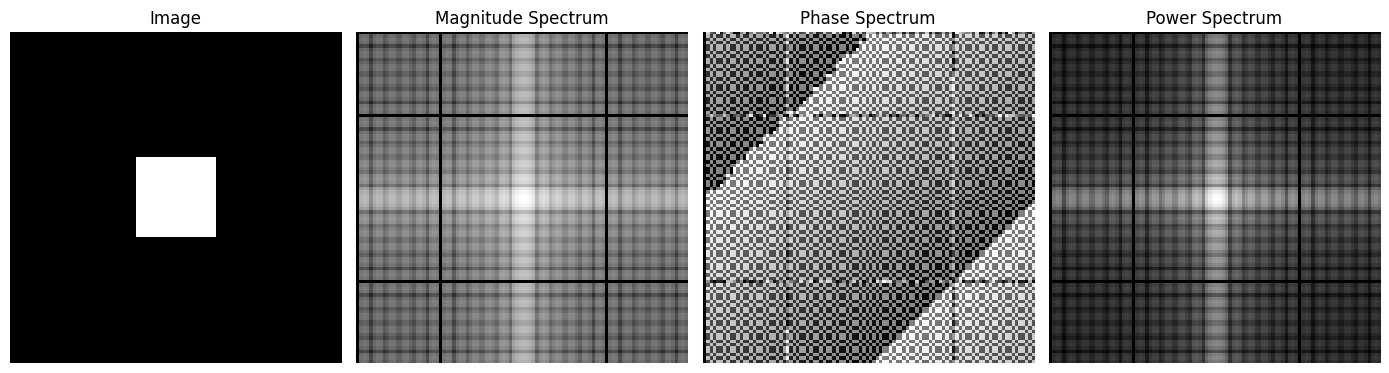

In [10]:
# Getting input for rectangle dimensions
length = int(input("Enter the length of the rectangle: "))
breadth = int(input("Enter the breadth of the rectangle: "))

print(f"Creating an image with a white rectangle at the center of size {length}x{breadth}")

# Plotting the spectrum
plot_spectrum(length, breadth)

Creating an image with a white rectangle at the center of size 50x50


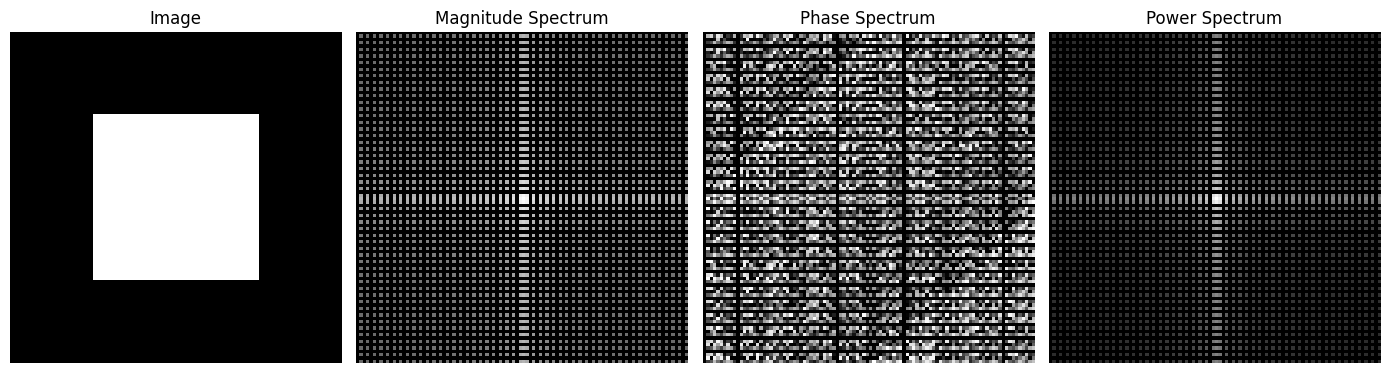

In [11]:
# Getting input for rectangle dimensions
length = int(input("Enter the length of the rectangle: "))
breadth = int(input("Enter the breadth of the rectangle: "))

print(f"Creating an image with a white rectangle at the center of size {length}x{breadth}")

# Plotting the spectrum
plot_spectrum(length, breadth)

**CONCLUSION**: The size of the white rectangle significantly influences the spectral characteristics of the image. Enlarging the rectangle broadens the peak in the **magnitude spectrum**, reflecting an increased presence of high-frequency components. Conversely, reducing the rectangle's size sharpens the peak, indicating fewer high-frequency components. However, the **phase spectrum** remains largely unaffected by changes in rectangle dimensions, as it is primarily determined by spatial arrangement. The **power spectrum**, directly proportional to the square of the magnitude spectrum, mirrors its variations. Overall, alterations in the rectangle size modulate the spatial frequency composition of the image, manifesting distinctly in the spectral analyses.

# 3.

(a) The following are the required striped image (of width 4 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum 

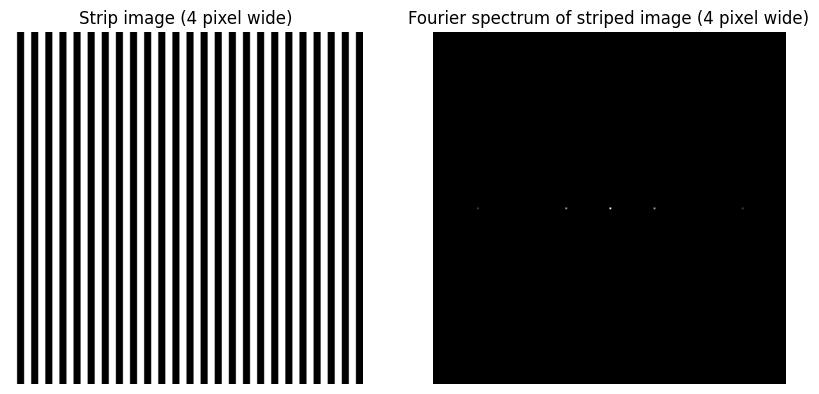

In [12]:
# Function to generate an image with alternating black and white vertical strips of a specified width.
def strip_image(width=2, shape=(200, 200)):
  img = np.zeros(shape)
  _, n = shape
  strip = 'w'

  for i in range(0, n, width):
    if strip == 'b':
      img[:,i:(i+width)]=0
      strip='w'
    else:
      img[:,i:(i+width)]=255
      strip='b'

  return img

# Generate strip image (4 pixels wide)
img4pix = strip_image(4)
magnitude_spectrum4pix = np.abs(np.fft.fftshift(np.fft.fft2(img4pix)))

# Plot the image and magnitude spectrum
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original 4-pixel wide strip image
axes[0].imshow(img4pix, cmap="gray")
axes[0].set_title("Strip image (4 pixel wide)")
axes[0].axis('off')

# Plot the magnitude spectrum of the Fourier transform of the 4-pixel wide strip image
axes[1].imshow(magnitude_spectrum4pix, cmap="gray")
axes[1].set_title("Fourier spectrum of striped image (4 pixel wide)")
axes[1].axis('off')

plt.show()

(b) The components of the spectrum are limited to the horizontal axis because the image consists of horizontal stripes, which have no vertical variations. The Fourier transform captures the frequency content along each dimension separately.

(c) The following are the required striped image (of width 1 pixel) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum 

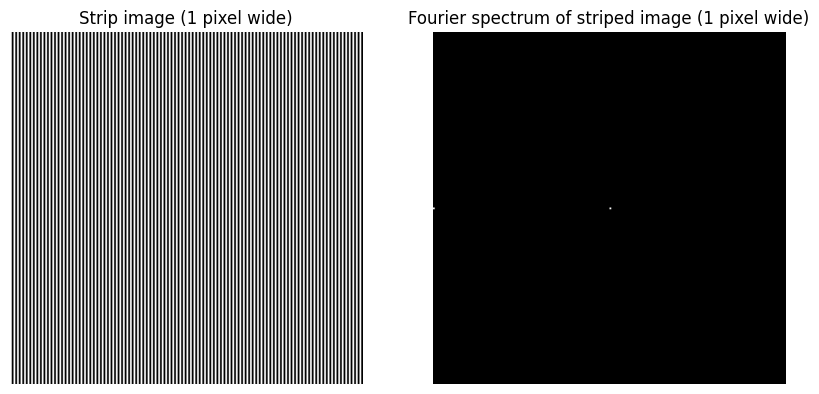

In [13]:
# Generate strip image (1 pixel wide)
img1pix = strip_image(1)
magnitude_spectrum1pix = np.abs(np.fft.fftshift(np.fft.fft2(img1pix)))

# Plot the image and magnitude spectrum
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original 1-pixel wide strip image
axes[0].imshow(img1pix, cmap="gray")
axes[0].set_title("Strip image (1 pixel wide)")
axes[0].axis('off')

# Plot the magnitude spectrum of the Fourier transform of the 1-pixel wide strip image
axes[1].imshow(magnitude_spectrum1pix, cmap="gray")
axes[1].set_title("Fourier spectrum of striped image (1 pixel wide)")
axes[1].axis('off')

plt.show()

(d) The DC terms in both images, whether with a width of 1 pixel or 4 pixels, remain identical. This is because the central DC component represents the average brightness of the image, which remains consistent regardless of the width of the image.

# 4.

In [14]:
img = cv2.imread("ricegrains.jpg", 0)

In [15]:
# Function to plot multiple images with corresponding titles
def plot_images(images, titles):
 
    num_images = len(images)
    fig = plt.figure(figsize=(15, 4))

    for i in range(num_images):
        ax = fig.add_subplot(1, num_images, i+1)
        ax.imshow(images[i], cmap="gray")
        ax.set_title(titles[i])
        ax.axis('off')

    plt.show()

# Define kernel sizes
kernel_sizes = [3, 5, 7]

# Initialize lists for storing filtered images
box_filters = []
gaussian_filters = []
median_filters = []

# Apply different filters to the image
for kernel_size in kernel_sizes:
    # Box filter
    box_filters.append(cv2.blur(img, (kernel_size, kernel_size)))

    # Gaussian filter
    gaussian_filters.append(cv2.GaussianBlur(img, (kernel_size, kernel_size), 1.5))

    # Median filter
    median_filters.append(cv2.medianBlur(img, kernel_size))

### Box Filter

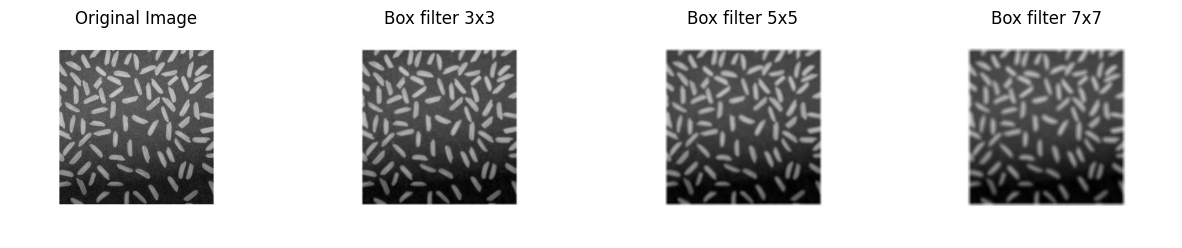

In [16]:
# Plot box filters
plot_images(
    images=[img] + box_filters,
    titles=["Original Image"] + [f"Box filter {kernel_size}x{kernel_size}" for kernel_size in kernel_sizes]
)

### Gaussian Filter

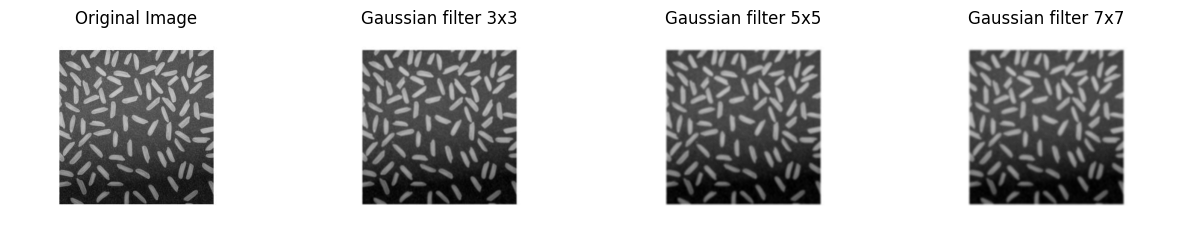

In [17]:
# Plot Gaussian filters
plot_images(
    images=[img] + gaussian_filters,
    titles=["Original Image"] + [f"Gaussian filter {kernel_size}x{kernel_size}" for kernel_size in kernel_sizes]
)

### Median Filter

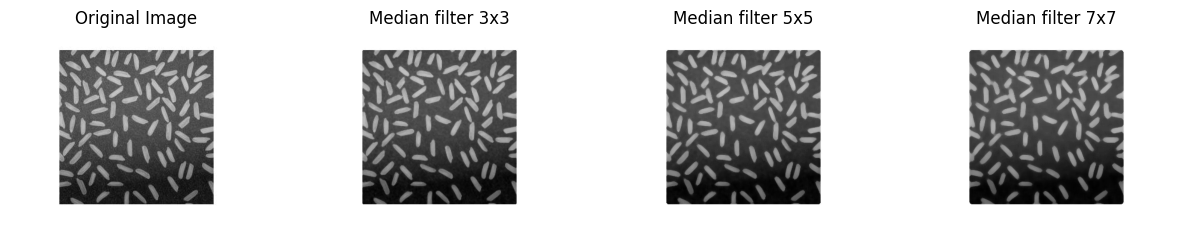

In [18]:
# Plot median filters
plot_images(
    images=[img] + median_filters,
    titles=["Original Image"] + [f"Median filter {kernel_size}x{kernel_size}" for kernel_size in kernel_sizes]
)

## Lowpass Filters Applied on Frequency Domain

In [19]:
# Function to apply Butterworth Lowpass Filter to an image
def butterworth_lowpass_filter(img, radius, n):

    # Shift the Fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    out = np.zeros((M, N))
    cx = round(M / 2)
    cy = round(N / 2)
    H = np.zeros((M, N))

    # Compute Butterworth lowpass filter
    for i in range(M):
        for j in range(N):
            d = np.sqrt((i - cx) ** 2 + (j - cy) ** 2)
            H[i, j] = 1 / (1 + ((d / radius) ** (2 * n)))

    # Apply the filter in frequency domain
    out_fourier = fshift * H
    
    # Inverse Fourier transform
    out = np.abs(np.fft.ifft2(out_fourier))
    return out

# Function to apply Gaussian Lowpass Filter to an image
def gaussian_lowpass_filter(img, radius):
    
    # Shift the Fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    out = np.zeros((M, N))
    cx = round(M / 2)
    cy = round(N / 2)
    H = np.zeros((M, N))

    # Compute Gaussian lowpass filter
    for i in range(M):
        for j in range(N):
            d = (i - cx) ** 2 + (j - cy) ** 2
            H[i, j] = np.exp(-(d / (2 * (radius ** 2))))

    # Apply the filter in frequency domain
    out_fourier = fshift * H
    
    # Inverse Fourier transform
    out = np.abs(np.fft.ifft2(out_fourier))
    return out.astype(np.uint8)

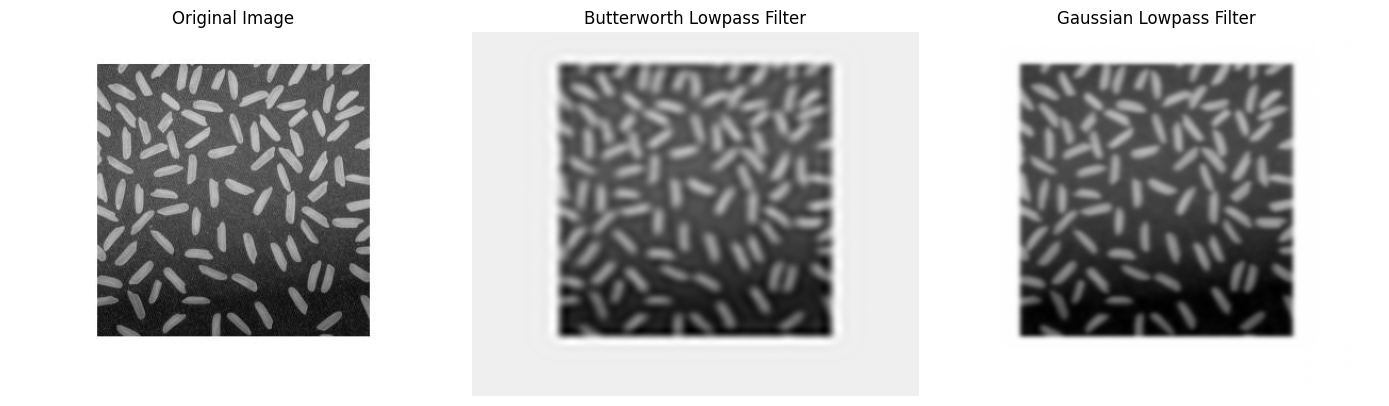

In [20]:
# Apply filters to the image
butterworth_img = butterworth_lowpass_filter(img, radius=30, n=4)
gauss_img = gaussian_lowpass_filter(img, radius=30)

# Plot the images
fig=plt.figure(figsize=(14, 4))

# Plot original image
fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# Plot image filtered with Butterworth lowpass filter
fig.add_subplot(1, 3, 2)
plt.imshow(butterworth_img, cmap="gray")
plt.title("Butterworth Lowpass Filter")
plt.axis('off')

# Plot image filtered with Gaussian lowpass filter
fig.add_subplot(1, 3, 3)
plt.imshow(gauss_img, cmap="gray")
plt.title("Gaussian Lowpass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

# 5.

In [21]:
img = cv2.imread("RBCs.bmp", 0)

### Spatial Domain Filtering

In [22]:
# Function to apply Gaussian blur
def apply_gaussian_blur(img, kernel_size, sigma):

    gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_filter = gaussian_kernel * gaussian_kernel.T
    blurred_img = cv2.filter2D(img, -1, gaussian_filter)

    return blurred_img

# Function to perform unsharp masking
def unsharp_masking(img, k, blurred_img):

    mask = img - blurred_img
    unsharped_img = img + k * mask
    
    return unsharped_img

# Load the Sobel filter
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)

# Define the Laplacian filter
lap = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Apply Gaussian blur
blurred_img = apply_gaussian_blur(img, kernel_size=5, sigma=10)

# Apply unsharp masking
K = 1
unsharped_img = unsharp_masking(img, K, blurred_img)

# Apply Sobel edge detector
sob_img = cv2.filter2D(img, -1, sobel)

# Apply Laplacian edge detector
lap_img = cv2.filter2D(img, -1, lap)

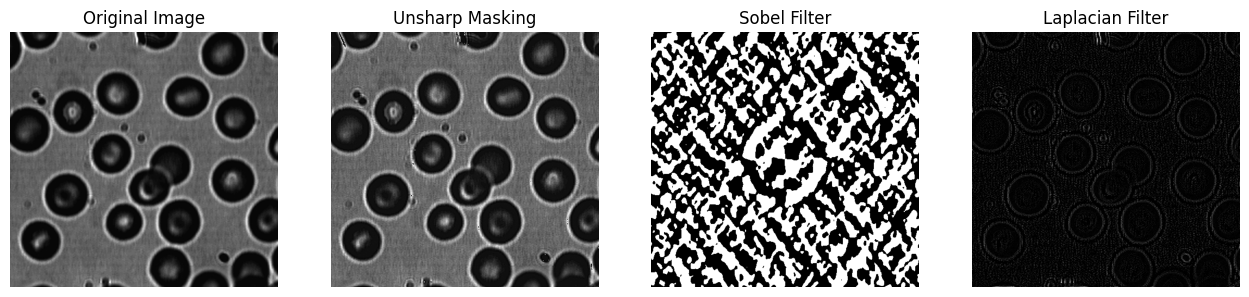

In [23]:
# Plot the images
fig = plt.figure(figsize=(20, 4))

# Plot original image
ax1 = fig.add_subplot(1, 5, 1)
ax1.imshow(img, cmap="gray")
ax1.set_title("Original Image")
ax1.axis('off')

# Plot unsharp masking result
ax2 = fig.add_subplot(1, 5, 2)
ax2.imshow(unsharped_img, cmap="gray")
ax2.set_title("Unsharp Masking")
ax2.axis('off')

# Plot Sobel edge detector result
ax3 = fig.add_subplot(1, 5, 3)
ax3.imshow(sob_img, cmap="gray")
ax3.set_title("Sobel Filter")
ax3.axis('off')

# Plot Laplacian edge detector result
ax4 = fig.add_subplot(1, 5, 4)
ax4.imshow(lap_img, cmap="gray")
ax4.set_title("Laplacian Filter")
ax4.axis('off')

plt.show()

### High Pass Filters on Frequency Domain

In [24]:
def butterworth_highpass(img, radius, n):
    # Shift the Fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    out = np.zeros((M, N))
    cx = round(M / 2)
    cy = round(N / 2)
    H = np.zeros((M, N))
  
    # Compute Butterworth highpass filter
    for i in range(M):
        for j in range(N):
            d = np.sqrt((i - cx) ** 2 + (j - cy) ** 2)
            H[i, j] = 1 / (1 + ((d / radius) ** (2 * n)))
    H = (1 - H)
    
    # Apply the filter in frequency domain
    out_fourier = fshift * H
    
    # Inverse Fourier transform
    out = np.abs(np.fft.ifft2(out_fourier))
    return out


def gaussian_highpass(img, radius):
    # Shift the Fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))
    M, N = img.shape
    out = np.zeros((M, N))
    cx = round(M / 2)
    cy = round(N / 2)
    H = np.zeros((M, N))
  
    # Compute Gaussian highpass filter
    for i in range(M):
        for j in range(N):
            d = (i - cx) ** 2 + (j - cy) ** 2
            H[i, j] = np.exp(-(d / (2 * (radius ** 2))))
    
    H = 1 - H
    
    # Apply the filter in frequency domain
    out_fourier = fshift * H
    
    # Inverse Fourier transform
    out = np.abs(np.fft.ifft2(out_fourier))
    return out.astype(np.uint8)

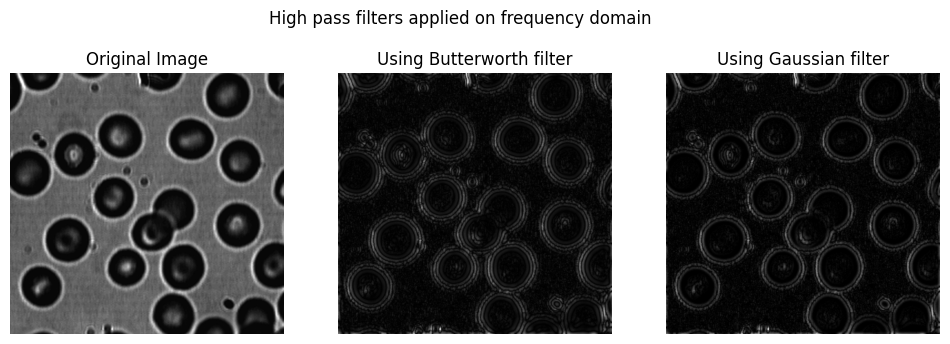

In [25]:
# Apply Butterworth and Gaussian highpass filters to the input image
butterworth_img = butterworth_highpass(img, 30, 4)  
gauss_img = gaussian_highpass(img, 30)  

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  
plt.suptitle("High pass filters applied on frequency domain")  

# Display original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display image with Butterworth highpass filter
axes[1].imshow(butterworth_img, cmap="gray")
axes[1].set_title("Using Butterworth filter")
axes[1].axis('off')

# Display image with Gaussian highpass filter
axes[2].imshow(gauss_img, cmap="gray")
axes[2].set_title("Using Gaussian filter")
axes[2].axis('off')

# Show the plot
plt.show()

# 6.

In [26]:
img = cv2.imread("cameraman.jpg", 0)

Execution time for applying 11x11 box filter: 0.0227 seconds


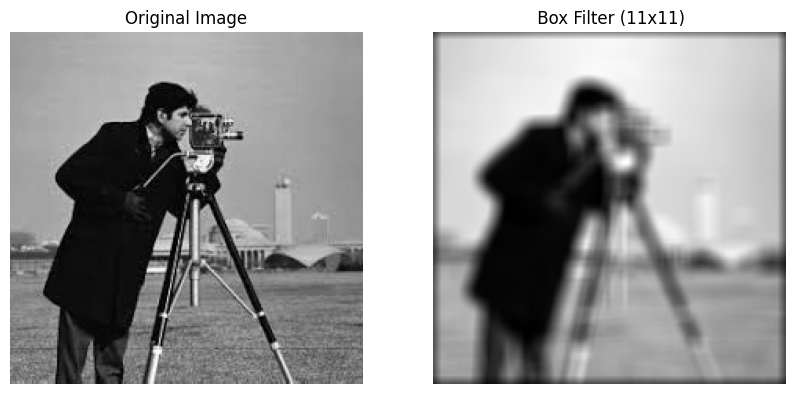

In [27]:
def apply_box_filter(img, filter_size):
    # Define the box filter kernel
    filter_kernel = (1 / (filter_size ** 2)) * np.ones((filter_size, filter_size)).astype(np.float32)

    # Convolve the image with the filter kernel and return the result
    return convolve2d(img, filter_kernel, 'same')

# Applying box filter
filter_size = 11

# Record start time
start_time = time.time()  

# Apply the box filter
box_img = apply_box_filter(img, filter_size) 

# Record end time
end_time = time.time()  

# Calculate execution time
execution_time = end_time - start_time

print(f"Execution time for applying {filter_size}x{filter_size} box filter: {execution_time:.4f} seconds")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display image with box filter applied
axes[1].imshow(box_img, cmap="gray")
axes[1].set_title(f" Box Filter ({filter_size}x{filter_size})")
axes[1].axis('off')

# Show the plot
plt.show()  

### Convolution in Frequency Domain

In [28]:
def pad_image(img, new_shape):
    # Extract the dimensions of the input image
    M, N = img.shape
    
    # Unpack the new shape tuple into new_M and new_N
    new_M, new_N = new_shape
    
    # Create a new NumPy array of zeros with the dimensions specified by new_shape
    padded_img = np.zeros((new_M, new_N))
    
    # Copy the original image into the top-left corner of the padded image
    padded_img[:M, :N] = img
    
    return padded_img

# Get dimensions of the original image
M, N = img.shape

# Double the dimensions to calculate the new dimensions for the padded image
P = 2 * M
Q = 2 * N

# Padding image and filter
padded_img = pad_image(img, new_shape=(P, Q))
padded_filter = pad_image(box_filter, (P, Q))

# Fourier transform of image and kernel
image_fft = np.fft.fftshift(np.fft.fft2(padded_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(padded_filter))

# Convolution in frequency domain
start_time = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end_time = time.time()
execution_time_fft = end_time - start_time

# Inverse Fourier transform to get spatial domain
transformed_spatial = np.abs(np.fft.ifft2(conv_fourier)).astype(np.uint8)
transformed_spatial_cut = transformed_spatial[3:3 + M, 3:3 + N]

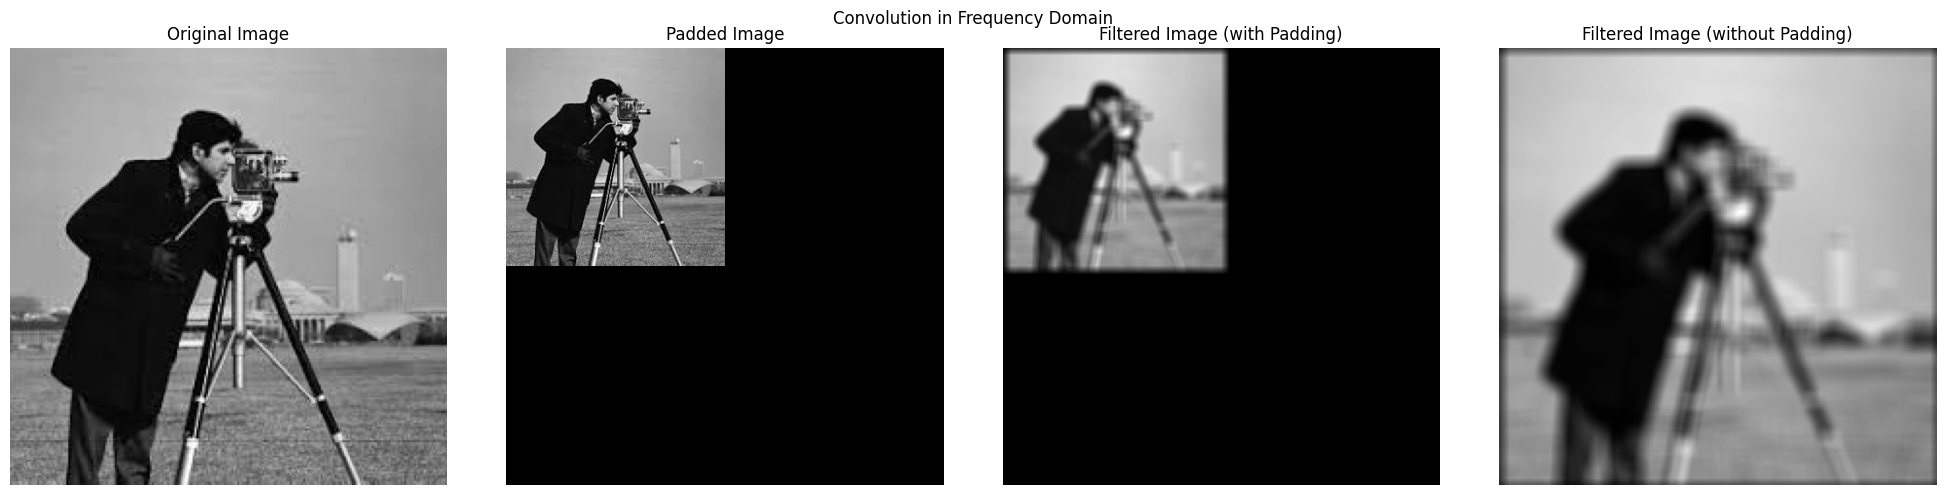

Execution time for convolution in frequency domain: 0.0022 seconds


In [29]:
# Plotting
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plotting the original image
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plotting the padded image
axes[1].imshow(padded_img, cmap="gray")
axes[1].set_title("Padded Image")
axes[1].axis('off')

# Plotting the filtered image with padding
axes[2].imshow(transformed_spatial, cmap="gray")
axes[2].set_title("Filtered Image (with Padding)")
axes[2].axis('off')

# Plotting the filtered image without padding
axes[3].imshow(transformed_spatial_cut, cmap="gray")
axes[3].set_title("Filtered Image (without Padding)")
axes[3].axis('off')

# Set the super title for the entire plot
plt.suptitle("Convolution in Frequency Domain")

# Adjust layout to prevent overlapping of titles
plt.tight_layout()

# Show the plot
plt.show()

# Printing execution time for convolution in frequency domain
print(f"Execution time for convolution in frequency domain: {execution_time_fft:.4f} seconds")


In [30]:
# Printing execution times for both operations
print(f"Execution time for applying {filter_size}x{filter_size} box filter: {execution_time:.4f} seconds")
print(f"Execution time for convolution in frequency domain: {execution_time_fft:.4f} seconds")

Execution time for applying 11x11 box filter: 0.0227 seconds
Execution time for convolution in frequency domain: 0.0022 seconds


**CONCLUSION**: Filtering in frequency domain is much faster than in spatial domain.